<a href="https://colab.research.google.com/github/veerusridatta/EIP4/blob/1st-Session/1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**




In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


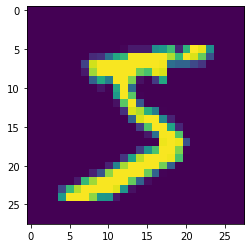

In [7]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [10]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [12]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [13]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 26))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 10)        330       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 10)          67610     
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 68,260
Trainable params: 68,260
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [16]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.




Epoch 1/10





60000/60000 [==============================] - 14s 240us/step - loss: 0.1881 - acc: 0.9455
Epoch 2/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.0709 - acc: 0.9782
Epoch 3/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.0543 - acc: 0.9836
Epoch 4/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.0438 - acc: 0.9865
Epoch 5/10
60000/60000 [==============================] - 7s 125us/step - loss: 0.0351 - acc: 0.9888
Epoch 6/10
60000/60000 [==============================] - 8s 125us/step - loss: 0.0283 - acc: 0.9914
Epoch 7/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.0224 - acc: 0.9927
Epoch 8/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.0179 - acc: 0.9943
Epoch 9/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.0147 - acc: 0.9950
Epoch 10/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [18]:
print(score)

[0.09700002244212719, 0.9797]


### Final Model

In [45]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32, 1, activation='relu'))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32, 1, activation='relu'))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 3))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`


In [46]:
model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 12, 12, 32)        2080      
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 5, 5, 32)         

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [48]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 13s 215us/step - loss: 0.1881 - acc: 0.9416
Epoch 2/10
60000/60000 [==============================] - 12s 193us/step - loss: 0.0607 - acc: 0.9814
Epoch 3/10
60000/60000 [==============================] - 12s 197us/step - loss: 0.0456 - acc: 0.9865
Epoch 4/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.0371 - acc: 0.9883
Epoch 5/10
60000/60000 [==============================] - 12s 192us/step - loss: 0.0307 - acc: 0.9901
Epoch 6/10
60000/60000 [==============================] - 12s 194us/step - loss: 0.0254 - acc: 0.9916
Epoch 7/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.0229 - acc: 0.9922
Epoch 8/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.0201 - acc: 0.9937
Epoch 9/10
60000/60000 [==============================] - 12s 193us/step - loss: 0.0180 - acc: 0.9942
Epoch 10/10
60000/60000 [==============================] - 12s 192us/step - loss: 

In [50]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.03028851424653658, 0.9922]


In [0]:
y_pred = model.predict(X_test)

In [52]:
print(y_pred[:9])
print(y_test[:9])

[[5.80147259e-19 2.74776053e-11 8.39982361e-10 4.13718810e-13
  2.31676606e-14 7.86479462e-16 1.23927766e-27 1.00000000e+00
  3.96500758e-12 4.34477840e-08]
 [1.36774370e-10 8.18957968e-09 1.00000000e+00 1.19745307e-11
  3.11684923e-13 2.96918624e-14 6.73488765e-11 9.03263670e-14
  1.49055423e-13 5.70844461e-16]
 [2.29213259e-10 9.99976158e-01 2.16089552e-06 2.77235013e-09
  2.57943066e-06 2.66771654e-08 1.49215538e-08 1.73573844e-05
  1.63770596e-06 5.56543833e-09]
 [1.00000000e+00 2.22463950e-15 1.33731692e-10 6.21054803e-13
  2.18889698e-11 3.99585837e-10 3.49116753e-08 8.38699096e-16
  2.44207987e-09 1.30914479e-09]
 [2.51715057e-16 7.26887571e-13 1.20607855e-11 4.42311407e-17
  9.99933243e-01 8.61667237e-13 3.34495821e-12 1.17753767e-11
  8.00522149e-10 6.67723434e-05]
 [5.89891254e-13 9.99990582e-01 2.99984357e-08 2.64938310e-12
  9.01544126e-07 1.94528664e-11 3.05222757e-11 8.51232107e-06
  2.01473735e-08 2.78164380e-09]
 [1.60028705e-25 1.77397742e-13 2.61469882e-12 3.93256010e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

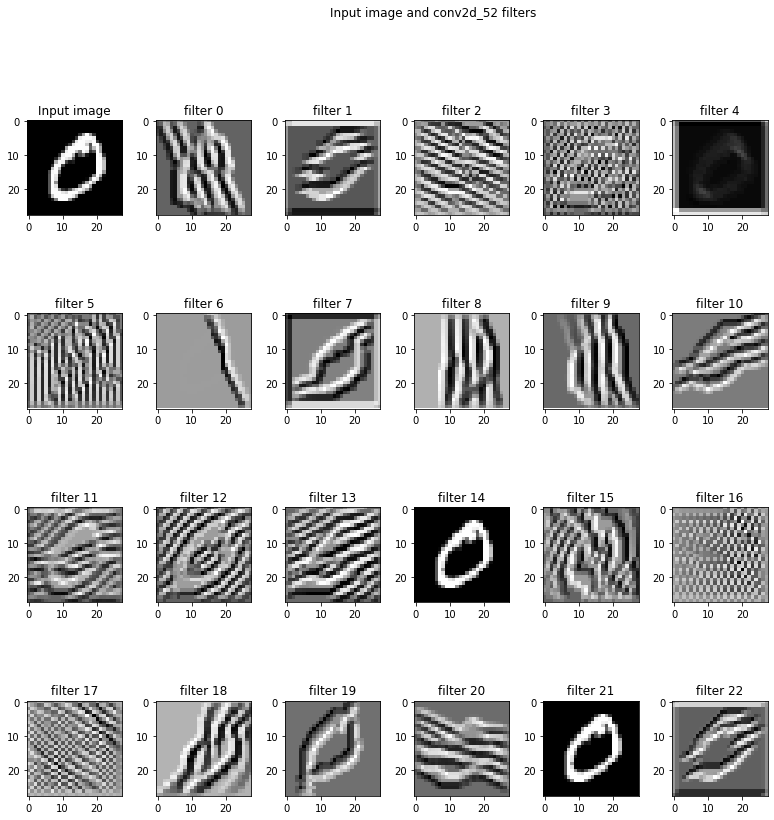

In [55]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[1]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_52'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()